In [1]:
import ROOT
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as LogNorm
import matplotlib.ticker as ticker
import math

fileBase_pi2k = "../histograms/analysis_note/pi2k_beta_plots.root"
fileBase_pi2k_matched = "../histograms/analysis_note/pi2k_beta_plots_matched.root"
fileBase_k2pi = "../histograms/analysis_note/k2pi_beta_plots.root"
fileBase_k2pi_matched = "../histograms/analysis_note/k2pi_beta_plots_matched.root"

file_matching_pi2k = "../data/acceptance_matching/matchCutPi2K.root"
file_matching_k2pi = "../data/acceptance_matching/matchCutK2Pi.root"

file_list_pi2k = [fileBase_pi2k, fileBase_pi2k_matched]
file_list_k2pi = [fileBase_k2pi, fileBase_k2pi_matched]


In [2]:
pi2k_files = [ uproot.open(fileName) for fileName in file_list_pi2k]
k2pi_files = [ uproot.open(fileName) for fileName in file_list_k2pi]

#print(pi2k_files[0].keys())

In [3]:
pip_hists_pi2k = [ inFile[f"hBeta_p_pip_Q2_0_xB_0_Z_0;1"] for inFile in pi2k_files]
pim_hists_pi2k = [ inFile[f"hBeta_p_pim_Q2_0_xB_0_Z_0;1"] for inFile in pi2k_files]

pip_hists_pi2k.extend( [inFile[f"hBeta_rich_p_pip_Q2_0_xB_0_Z_0;1"]for inFile in pi2k_files ])
pim_hists_pi2k.extend( [inFile[f"hBeta_rich_p_pim_Q2_0_xB_0_Z_0;1"]for inFile in pi2k_files ])

In [4]:
pip_hists_k2pi = [ inFile[f"hBeta_p_pip_Q2_0_xB_0_Z_0;1"] for inFile in k2pi_files]
pim_hists_k2pi = [ inFile[f"hBeta_p_pim_Q2_0_xB_0_Z_0;1"] for inFile in k2pi_files]

pip_hists_k2pi.extend( [inFile[f"hBeta_rich_p_pip_Q2_0_xB_0_Z_0;1"]for inFile in k2pi_files ])
pim_hists_k2pi.extend( [inFile[f"hBeta_rich_p_pim_Q2_0_xB_0_Z_0;1"]for inFile in k2pi_files ])

In [5]:
values_pip = [hist.values() for hist in pip_hists_pi2k]
for values in values_pip:
    values[values == 0] = np.nan

values_pim = [hist.values() for hist in pim_hists_pi2k]
for values in values_pim:
    values[values == 0] = np.nan


xEdges = pip_hists_pi2k[0].axis(0).edges()
yEdges = pip_hists_pi2k[0].axis(1).edges()


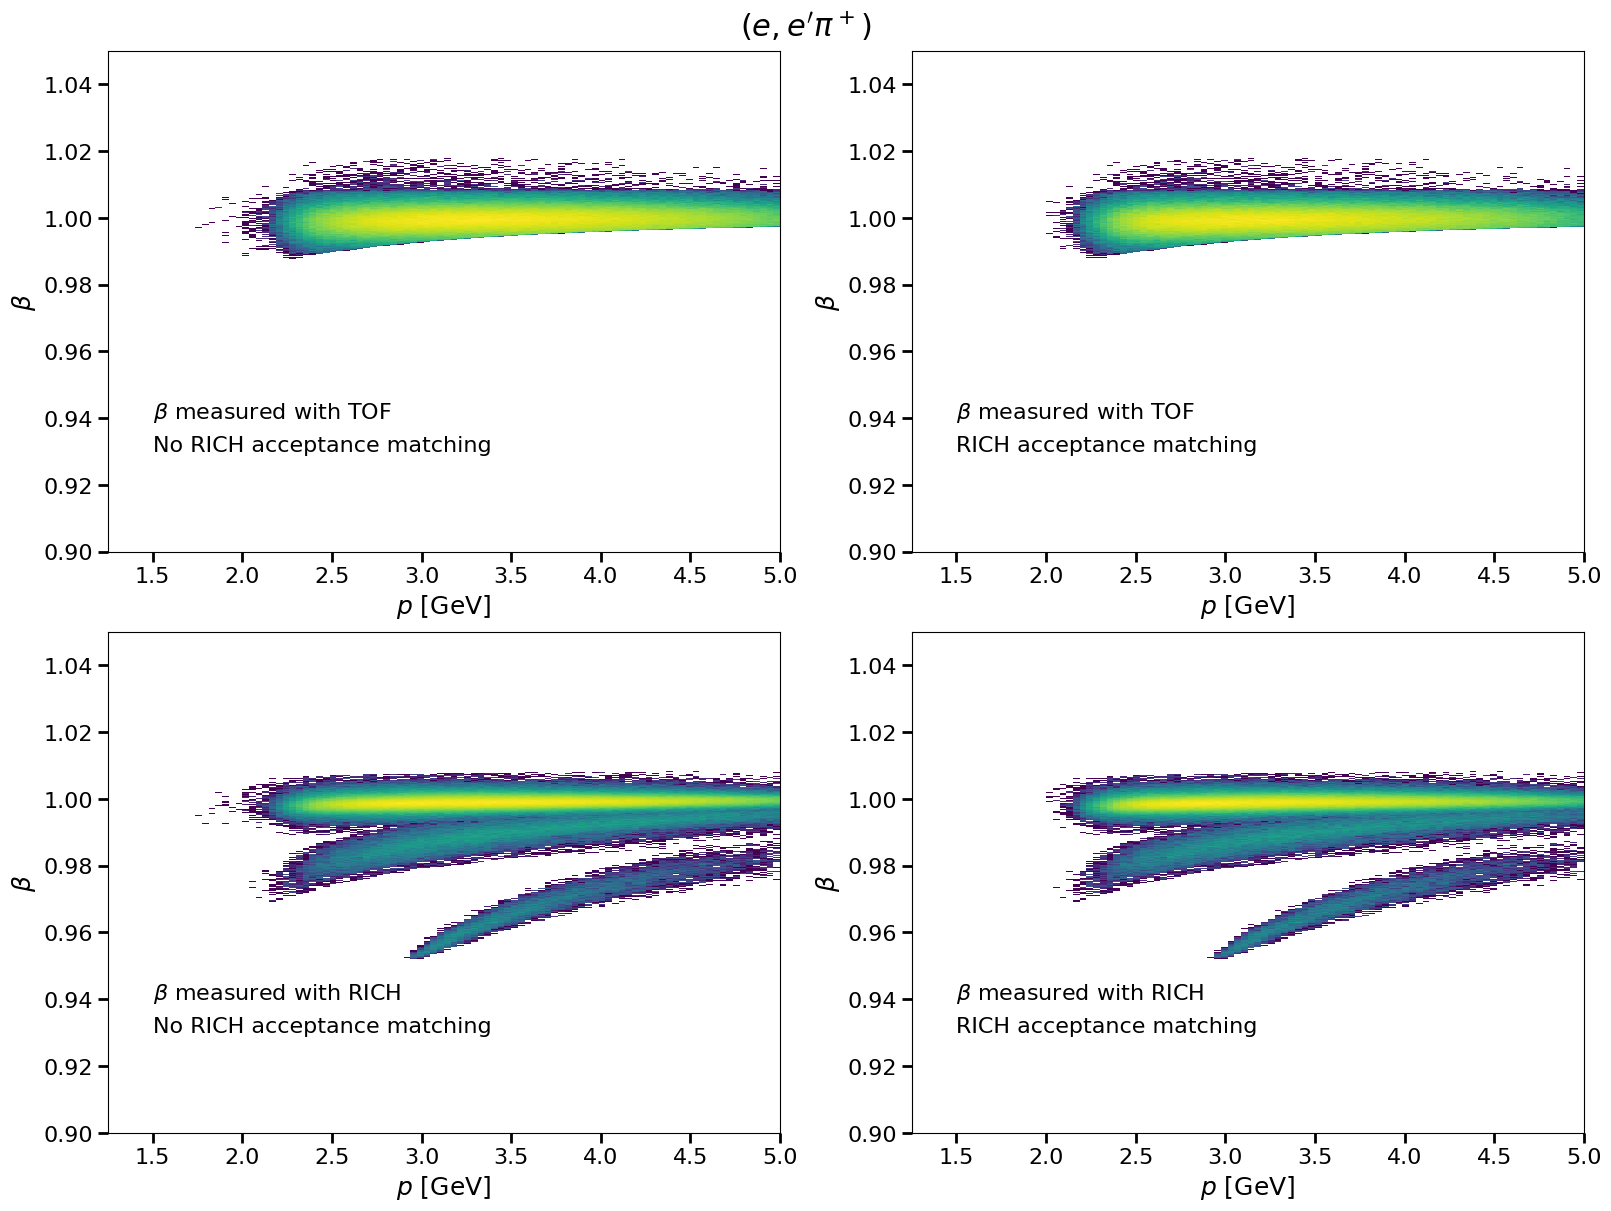

In [6]:
fig, axs = plt.subplots(2,2, figsize=(16,12), layout="constrained")
fig.suptitle(r"$(e, e^{\prime}\pi^+)$", size=22)
for ax in axs.flatten():
    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=7)
    ax.tick_params(which='minor', length=4)
    ax.tick_params(labelsize=16)
    ax.set_xlabel(r'$p$ [GeV]', size = 18)
    ax.set_ylabel(r'$\beta$',size=18)
    #ax.label_outer()

axs[0,0].pcolormesh(xEdges, yEdges, values_pip[0].T, cmap='viridis', shading='auto',norm='log')
axs[0,0].text(1.5, .94, r'$\beta$ measured with TOF', size=16)
axs[0,0].text(1.5, .93, 'No RICH acceptance matching', size=16)
axs[0,1].pcolormesh(xEdges, yEdges, values_pip[1].T, cmap='viridis', shading='auto',norm='log')
axs[0,1].text(1.5, .94, r'$\beta$ measured with TOF', size=16)
axs[0,1].text(1.5, .93, 'RICH acceptance matching', size=16)
axs[1,0].pcolormesh(xEdges, yEdges, values_pip[2].T, cmap='viridis', shading='auto',norm='log')
axs[1,0].text(1.5, .94, r'$\beta$ measured with RICH', size=16)
axs[1,0].text(1.5, .93, 'No RICH acceptance matching', size=16)
axs[1,1].pcolormesh(xEdges, yEdges, values_pip[3].T, cmap='viridis', shading='auto',norm='log')
axs[1,1].text(1.5, .94, r'$\beta$ measured with RICH', size=16)
axs[1,1].text(1.5, .93, 'RICH acceptance matching', size=16)

plt.savefig("kaon_beta_p/pi2k_pip_beta_p.pdf")

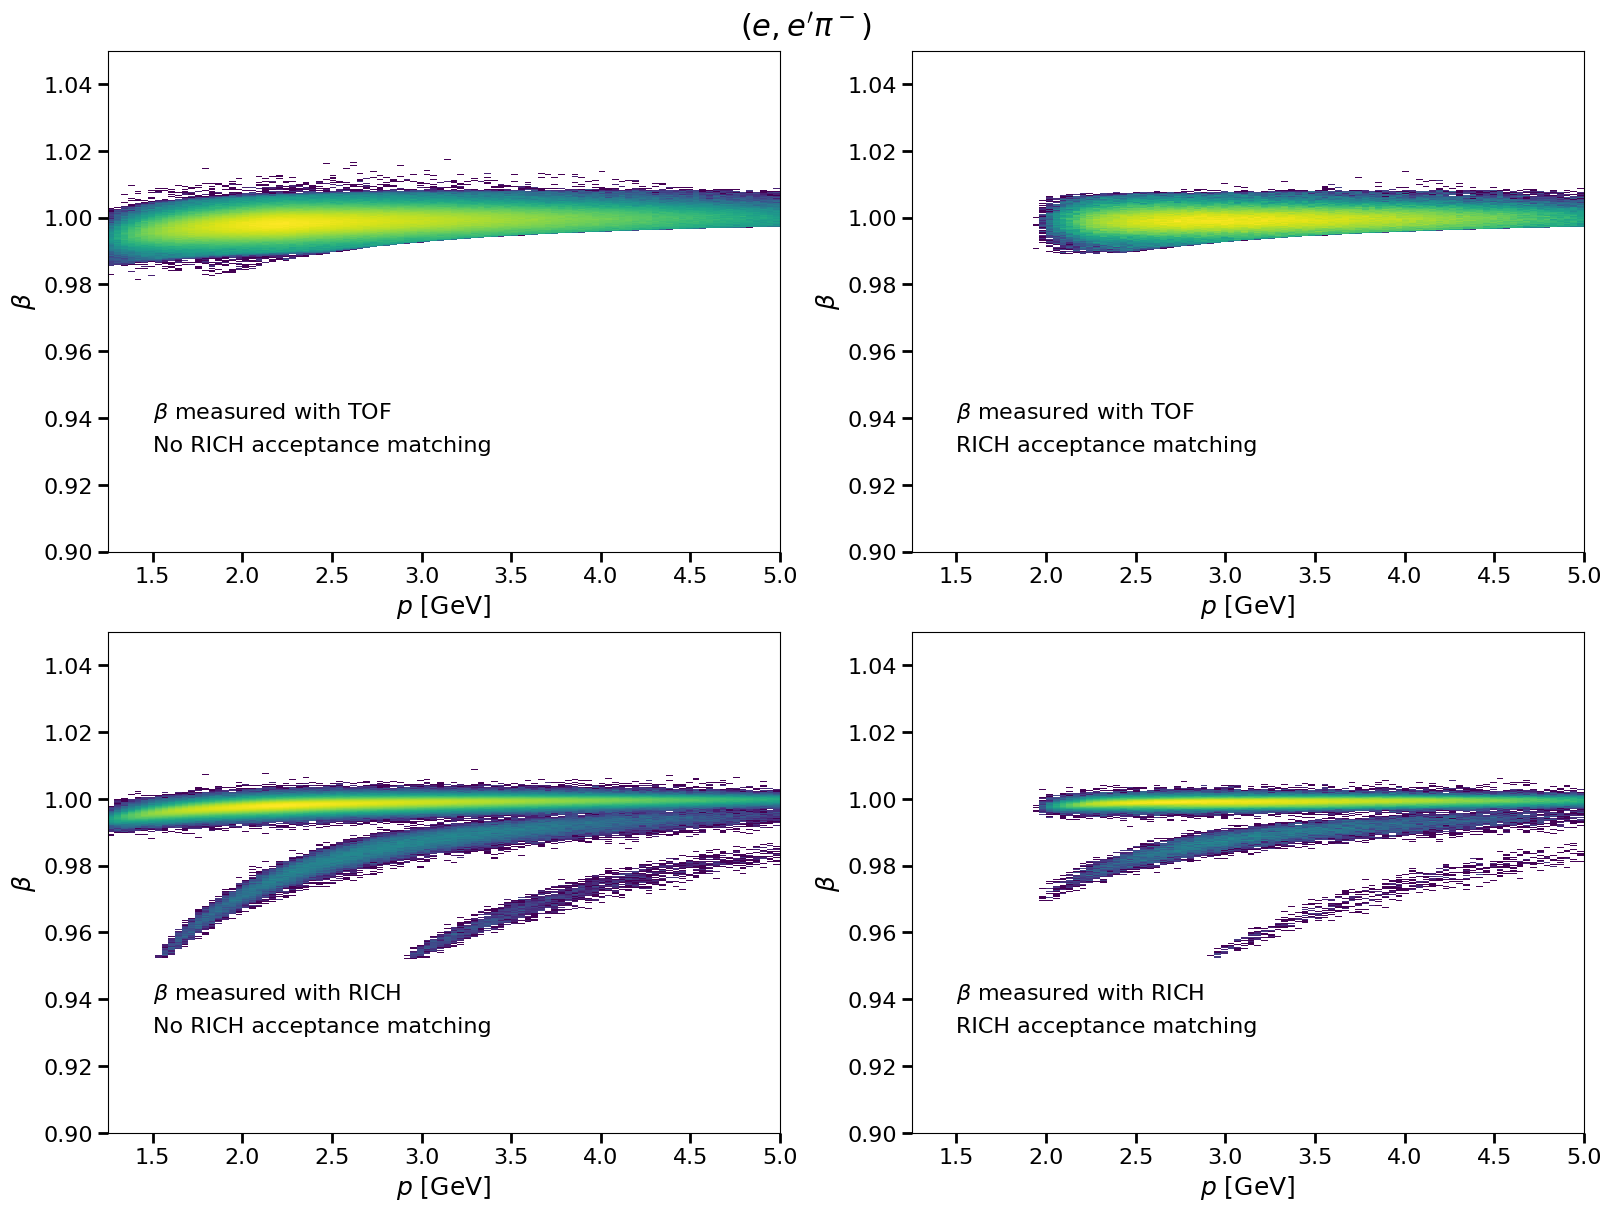

In [139]:
fig, axs = plt.subplots(2,2, figsize=(16,12), layout="constrained")
fig.suptitle(r"$(e, e^{\prime}\pi^-)$", size=22)
for ax in axs.flatten():
    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=7)
    ax.tick_params(which='minor', length=4)
    ax.tick_params(labelsize=16)
    ax.set_xlabel(r'$p$ [GeV]', size = 18)
    ax.set_ylabel(r'$\beta$',size=18)
    #ax.label_outer()

axs[0,0].pcolormesh(xEdges, yEdges, values_pim[0].T, cmap='viridis', shading='auto',norm='log')
axs[0,0].text(1.5, .94, r'$\beta$ measured with TOF', size=16)
axs[0,0].text(1.5, .93, 'No RICH acceptance matching', size=16)
axs[0,1].pcolormesh(xEdges, yEdges, values_pim[1].T, cmap='viridis', shading='auto',norm='log')
axs[0,1].text(1.5, .94, r'$\beta$ measured with TOF', size=16)
axs[0,1].text(1.5, .93, 'RICH acceptance matching', size=16)
axs[1,0].pcolormesh(xEdges, yEdges, values_pim[2].T, cmap='viridis', shading='auto',norm='log')
axs[1,0].text(1.5, .94, r'$\beta$ measured with RICH', size=16)
axs[1,0].text(1.5, .93, 'No RICH acceptance matching', size=16)
axs[1,1].pcolormesh(xEdges, yEdges, values_pim[3].T, cmap='viridis', shading='auto',norm='log')
axs[1,1].text(1.5, .94, r'$\beta$ measured with RICH', size=16)
axs[1,1].text(1.5, .93, 'RICH acceptance matching', size=16)

plt.savefig("kaon_beta_p/pi2k_pim_beta_p.pdf")

In [7]:
values_pip = [hist.values() for hist in pip_hists_k2pi]
for values in values_pip:
    values[values == 0] = np.nan

values_pim = [hist.values() for hist in pim_hists_k2pi]
for values in values_pim:
    values[values == 0] = np.nan


xEdges = pip_hists_k2pi[0].axis(0).edges()
yEdges = pip_hists_k2pi[0].axis(1).edges()


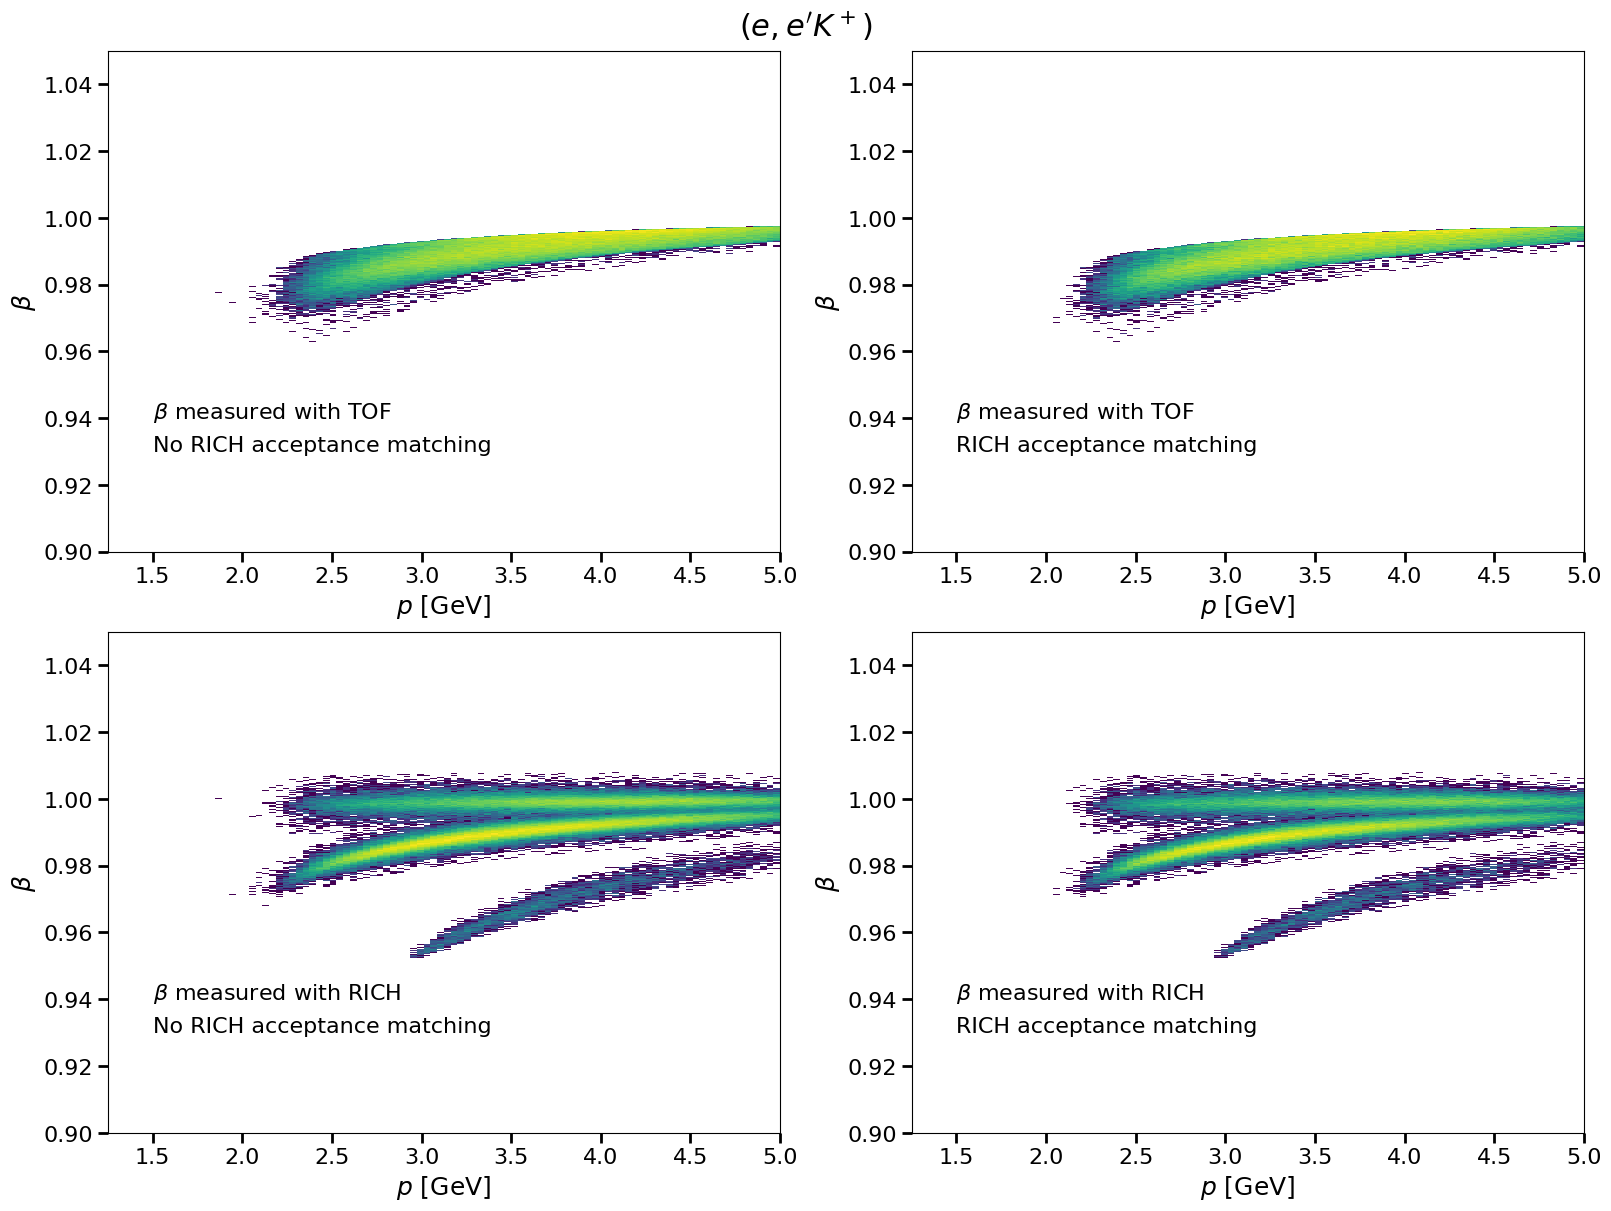

In [8]:
fig, axs = plt.subplots(2,2, figsize=(16,12), layout="constrained")
fig.suptitle(r"$(e, e^{\prime}K^+)$", size=22)
for ax in axs.flatten():
    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=7)
    ax.tick_params(which='minor', length=4)
    ax.tick_params(labelsize=16)
    ax.set_xlabel(r'$p$ [GeV]', size = 18)
    ax.set_ylabel(r'$\beta$',size=18)
    #ax.label_outer()

axs[0,0].pcolormesh(xEdges, yEdges, values_pip[0].T, cmap='viridis', shading='auto',norm='log')
axs[0,0].text(1.5, .94, r'$\beta$ measured with TOF', size=16)
axs[0,0].text(1.5, .93, 'No RICH acceptance matching', size=16)
axs[0,1].pcolormesh(xEdges, yEdges, values_pip[1].T, cmap='viridis', shading='auto',norm='log')
axs[0,1].text(1.5, .94, r'$\beta$ measured with TOF', size=16)
axs[0,1].text(1.5, .93, 'RICH acceptance matching', size=16)
axs[1,0].pcolormesh(xEdges, yEdges, values_pip[2].T, cmap='viridis', shading='auto',norm='log')
axs[1,0].text(1.5, .94, r'$\beta$ measured with RICH', size=16)
axs[1,0].text(1.5, .93, 'No RICH acceptance matching', size=16)
axs[1,1].pcolormesh(xEdges, yEdges, values_pip[3].T, cmap='viridis', shading='auto',norm='log')
axs[1,1].text(1.5, .94, r'$\beta$ measured with RICH', size=16)
axs[1,1].text(1.5, .93, 'RICH acceptance matching', size=16)

plt.savefig("kaon_beta_p/k2pi_pip_beta_p.pdf")

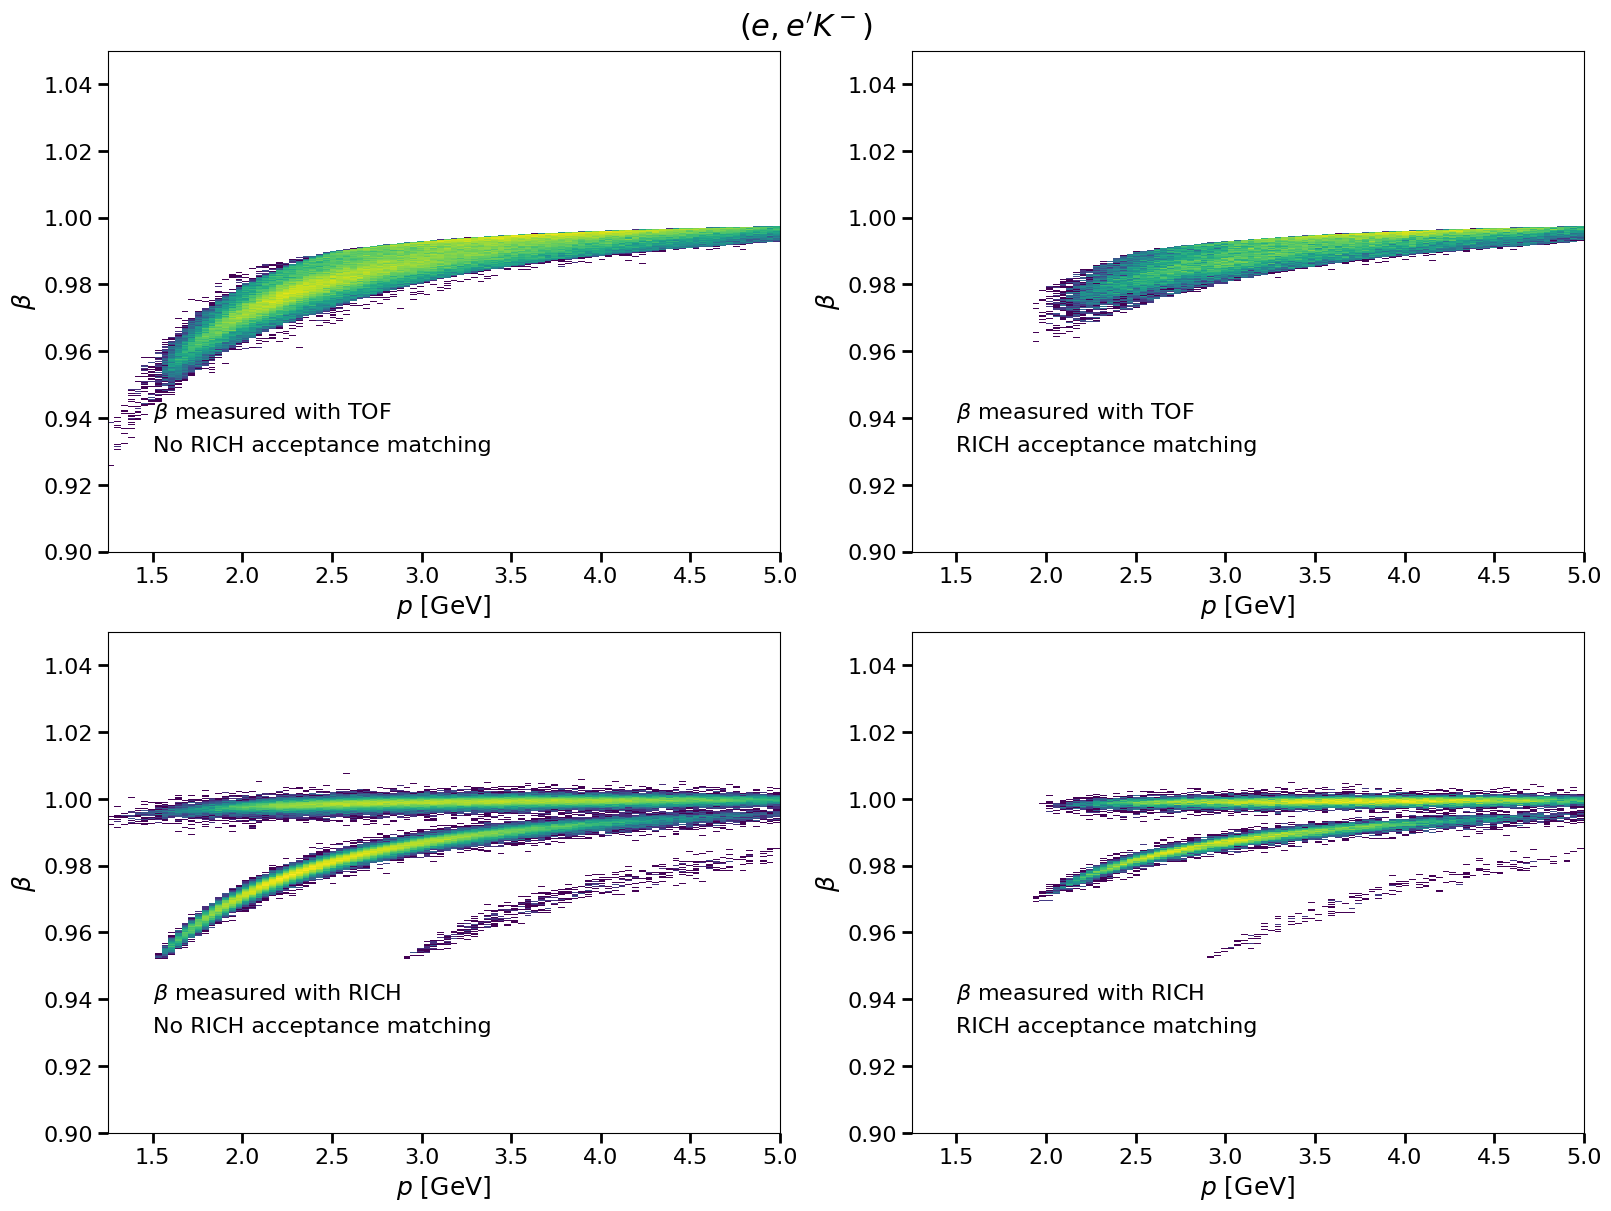

In [142]:
fig, axs = plt.subplots(2,2, figsize=(16,12), layout="constrained")
fig.suptitle(r"$(e, e^{\prime}K^-)$", size=22)
for ax in axs.flatten():
    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=7)
    ax.tick_params(which='minor', length=4)
    ax.tick_params(labelsize=16)
    ax.set_xlabel(r'$p$ [GeV]', size = 18)
    ax.set_ylabel(r'$\beta$',size=18)
    #ax.label_outer()

axs[0,0].pcolormesh(xEdges, yEdges, values_pim[0].T, cmap='viridis', shading='auto',norm='log')
axs[0,0].text(1.5, .94, r'$\beta$ measured with TOF', size=16)
axs[0,0].text(1.5, .93, 'No RICH acceptance matching', size=16)
axs[0,1].pcolormesh(xEdges, yEdges, values_pim[1].T, cmap='viridis', shading='auto',norm='log')
axs[0,1].text(1.5, .94, r'$\beta$ measured with TOF', size=16)
axs[0,1].text(1.5, .93, 'RICH acceptance matching', size=16)
axs[1,0].pcolormesh(xEdges, yEdges, values_pim[2].T, cmap='viridis', shading='auto',norm='log')
axs[1,0].text(1.5, .94, r'$\beta$ measured with RICH', size=16)
axs[1,0].text(1.5, .93, 'No RICH acceptance matching', size=16)
axs[1,1].pcolormesh(xEdges, yEdges, values_pim[3].T, cmap='viridis', shading='auto',norm='log')
axs[1,1].text(1.5, .94, r'$\beta$ measured with RICH', size=16)
axs[1,1].text(1.5, .93, 'RICH acceptance matching', size=16)

plt.savefig("kaon_beta_p/k2pi_pim_beta_p.pdf")